

Step 1: Importing Necessary Libraries



In [5]:
# Data analysis and Manipulation
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt

# Importing Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)

# Initializing Plotly
pio.renderers.default = 'colab'


Step 2: Importing the Datasets

In [6]:
# Importing Dataset1
dataset1 = pd.read_csv("/content/drive/MyDrive/COVID Data Analysis/covid.csv")
dataset1.head() # returns first 5 rows


Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region iso_alpha  
0      190640.0        Americas       USA  
1       62085.0        Americas       BRA  
2       16035.0  South-EastAsia       IND  
3      203623.0          Europe       RUS  
4       53044.0          Africa       ZAF

In [7]:
# Returns tuple of shape (Rows, columns)
print(dataset1.shape)

# Returns size of dataframe
print(dataset1.size)


(209, 17)
3553


In [8]:
# Information about Dataset1
# return concise summary of dataframe
dataset1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
 16  iso_alpha         209 non-null    object 
dt

In [10]:
# Importing Dataset2
dataset2 = pd.read_csv("/content/drive/MyDrive/COVID Data Analysis/covid_grouped.csv")
dataset2.head() # return first 5 rows of dataset2


Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region iso_alpha  
0           0              0  Eastern Mediterranean       AFG  
1           0              0                 Europe       ALB  
2           0              0                 Africa       DZA  
3           0              0                 Europe       AND  
4           0              0                 Africa       AGO

Getting dataset information

In [11]:
# Returns tuple of shape (Rows, columns)
print(dataset2.shape)

# Returns size of dataframe
print(dataset2.size)


(35156, 11)
386716


 Dataset information

In [12]:
# Information about Dataset2
dataset2.info() # return concise summary of dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
 10  iso_alpha       35156 non-null  object
dtypes: int64(7), object(4)
memory usage: 3.0+ MB


Step 3: Dataset cleaning

In [14]:
# Columns labels of a Dataset1
dataset1.columns


Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'iso_alpha'],
      dtype='object')

Don’t need ‘NewCases’, ‘NewDeaths’, ‘NewRecovered’ columns as they contains NaN values. So drop these columns by drop() function of pandas.

Syntax:

drop(name of columns)

In [15]:
# Drop NewCases, NewDeaths, NewRecovered rows from dataset1

dataset1.drop(['NewCases', 'NewDeaths', 'NewRecovered'],
			axis=1, inplace=True)

# Select random set of values from dataset1
dataset1.sample(5)


Country/Region          Continent  Population  TotalCases  \
41             Singapore               Asia   5854932.0       54555   
195                 Fiji  Australia/Oceania    897095.0          27   
187  Antigua and Barbuda      North America     98010.0          92   
197          Timor-Leste               Asia   1320812.0          25   
171           Martinique      North America    375235.0         276   

     TotalDeaths  TotalRecovered  ActiveCases  Serious,Critical  \
41          27.0         48031.0       6497.0               NaN   
195          1.0            18.0          8.0               NaN   
187          3.0            76.0         13.0               1.0   
197          NaN            24.0          1.0               NaN   
171         15.0            98.0        163.0               1.0   

     Tot Cases/1M pop  Deaths/1M pop  TotalTests  Tests/1M pop  \
41             9318.0            5.0   1474372.0      251817.0   
195              30.0            1.0      6693.0        7461.0   
187             939.0           31.0      1500.0       15305.0   
197              19.0            NaN      4238.0        3209.0   
171             736.0           40.0     12227.0       32585.0   

         WHO Region iso_alpha  
41   WesternPacific       SGP  
195  WesternPacific       FJI  
187        Americas       ATG  
197  South-EastAsia       TLS  
171             NaN       MTQ

Creating table using plotly express

In [16]:
# Import create_table Figure Factory

from plotly.figure_factory import create_table

colorscale = [[0, '#4d004c'], [.5, '#f2e5ff'], [1, '#ffffff']]
table = create_table(dataset1.head(15), colorscale=colorscale)
py.iplot(table)


Step 4: Bar graphs- Comparisons between COVID infected countries

In [19]:
px.bar(dataset1.head(15), x = 'Country/Region',
	y = 'TotalCases',color = 'TotalCases',
	height = 500,hover_data = ['Country/Region', 'Continent'])


In [20]:
px.bar(dataset1.head(15), x = 'Country/Region', y = 'TotalCases',
	color = 'TotalDeaths', height = 500,
	hover_data = ['Country/Region', 'Continent'])


In [22]:
px.bar(dataset1.head(15), x = 'TotalTests', y = 'Country/Region',
	color = 'TotalTests',orientation ='h', height = 500,
	hover_data = ['Country/Region', 'Continent'])


In [23]:
px.bar(dataset1.head(15), x = 'TotalTests', y = 'Continent',
	color = 'TotalTests',orientation ='h', height = 500,
	hover_data = ['Country/Region', 'Continent'])


Step 5: Data Visualization through Bubble Charts-Continent Wise

In [25]:
px.scatter(dataset1, x='Continent',y='TotalCases',
		hover_data=['Country/Region', 'Continent'],
		color='TotalCases', size='TotalCases', size_max=80)


Step 6: Data Visualization through Bubble Charts-Country Wise

In [27]:
px.scatter(dataset1.head(100), x='Country/Region', y='TotalCases',
		hover_data=['Country/Region', 'Continent'],
		color='TotalCases', size='TotalCases', size_max=80)


In [28]:
px.scatter(dataset1.head(10), x='Country/Region', y= 'TotalDeaths',
		hover_data=['Country/Region', 'Continent'],
		color='Country/Region', size= 'TotalDeaths', size_max=80)


In [29]:
px.scatter(dataset1.head(30), x='Country/Region', y= 'Tests/1M pop',
		hover_data=['Country/Region', 'Continent'],
		color='Country/Region', size= 'Tests/1M pop', size_max=80)


In [30]:
px.scatter(dataset1.head(30), x='Country/Region', y= 'Tests/1M pop',
		hover_data=['Country/Region', 'Continent'],
		color='Tests/1M pop', size= 'Tests/1M pop', size_max=80)


In [31]:
px.scatter(dataset1.head(30), x='TotalCases', y= 'TotalDeaths',
		hover_data=['Country/Region', 'Continent'],
		color='TotalDeaths', size= 'TotalDeaths', size_max=80)


In [32]:
px.scatter(dataset1.head(30), x='TotalTests', y= 'TotalCases',
		hover_data=['Country/Region', 'Continent'],
		color='TotalTests', size= 'TotalTests', size_max=80,
		log_x=True, log_y=True)


Step 7: Advanced Data Visualization- Bar graphs for All top infected Countries

In [33]:
px.bar(dataset2, x="Date", y="Confirmed", color="Confirmed",
	hover_data=["Confirmed", "Date", "Country/Region"], height=400)


In [34]:
px.bar(dataset2, x="Date", y="Deaths", color="Deaths",
	hover_data=["Confirmed", "Date", "Country/Region"],
	log_y=False, height=400)


Step 8: Countries Specific COVID Data Visualization: (United States)

Refining dataset to get only USA data

In [35]:
df_US= dataset2.loc[dataset2["Country/Region"]=="US"]


In [36]:
px.bar(df_US, x="Date", y="Confirmed", color="Confirmed", height=400)


In [37]:
df_US

Date Country/Region  Confirmed  Deaths  Recovered   Active  \
173    2020-01-22             US          1       0          0        1   
360    2020-01-23             US          1       0          0        1   
547    2020-01-24             US          2       0          0        2   
734    2020-01-25             US          2       0          0        2   
921    2020-01-26             US          5       0          0        5   
...           ...            ...        ...     ...        ...      ...   
34394  2020-07-23             US    4038816  144430    1233269  2661117   
34581  2020-07-24             US    4112531  145560    1261624  2705347   
34768  2020-07-25             US    4178970  146465    1279414  2753091   
34955  2020-07-26             US    4233923  146935    1297863  2789125   
35142  2020-07-27             US    4290259  148011    1325804  2816444   

       New cases  New deaths  New recovered WHO Region iso_alpha  
173            0           0              0   Americas       USA  
360            0           0              0   Americas       USA  
547            1           0              0   Americas       USA  
734            0           0              0   Americas       USA  
921            3           0              0   Americas       USA  
...          ...         ...            ...        ...       ...  
34394      68695        1114          22420   Americas       USA  
34581      73715        1130          28355   Americas       USA  
34768      66439         905          17790   Americas       USA  
34955      54953         470          18449   Americas       USA  
35142      56336        1076          27941   Americas       USA  

[188 rows x 11 columns]

Line plot

In [38]:
px.line(df_US,x="Date", y="Recovered", height=400)


In [39]:
px.line(df_US,x="Date", y="Deaths", height=400)


Scatter plot

In [40]:
px.scatter(df_US, x="Confirmed", y="Deaths", height=400)


Step 9: Visualization of Data in terms of Maps

We can use choropleth to visualize the data in terms of maps, with maps usually being the predominant way of visualizing the data. Since COVID-19 is a global phenomenon and so we look through and fix them in terms of wall maps. Ortho-graphics, rectangular and natural earth projection to visualize the data With dataset2 for the purpose as it has Dates column. It will look at the growth of Covid-19 (from Jan to July 2020) as in how the virus reached across the world.

Choropleth is an amazing representation of data on a map. Choropleth maps provide an easy way to visualize how a measurement varies across a geographic areal-Life

Syntax: chloropleth()

parameters:

dataset
locations= ISOALPHA
color
hover_name
color_continuous_scale= [RdYlGn, Blues, Viridis…]
animation_frame= Date

In [45]:
px.choropleth(dataset2,
			locations="iso_alpha",
			color="Confirmed",
			hover_name="Country/Region",
			color_continuous_scale="Reds",
			animation_frame="Date")


This creates an animation containing visualizations from January to July 2020. Playing this animation will make it more clear how the virus spread around the world. The darker the color, the higher the confirmed cases are.

In [46]:
px.choropleth(dataset2,
			locations='iso_alpha',
			color="Deaths",
			hover_name="Country/Region",
			color_continuous_scale="Viridis",
			animation_frame="Date" )


This code creates an animation of death cases by date. By playing this animation it will be shown how deaths increase around the world.

Natural Earth projection is a compromise pseudo-cylindrical map projection for world maps.

In [47]:
px.choropleth(dataset2,
			locations='iso_alpha',
			color="Recovered",
			hover_name="Country/Region",
			color_continuous_scale="RdYlGn",
			projection="natural earth",
			animation_frame="Date" )


Step 10: Visualize text using Word Cloud


Visualize the causes of death due to covid-19, as covid-19 affects people in different ways, hence creating a word cloud to visualize the leading cause of covid-19 deaths. To visualize the text the steps need to be followed are-

Used to convert data elements of an array into list.
Convert the string to one single string.
Convert the string into word cloud
Dataset3: This dataset contains real world examples of number of Covid-19 deaths and the reasons behind the deaths.





In [49]:
dataset3= pd.read_csv("/content/drive/MyDrive/COVID Data Analysis/coviddeath.csv")
dataset3.head()


Data as of  Start Week    End Week State       Condition Group  \
0  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
1  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
2  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
3  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
4  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   

                 Condition ICD10_codes Age Group  Number of COVID-19 Deaths  \
0  Influenza and pneumonia     J09-J18      0-24                      122.0   
1  Influenza and pneumonia     J09-J18     25-34                      596.0   
2  Influenza and pneumonia     J09-J18     35-44                     1521.0   
3  Influenza and pneumonia     J09-J18     45-54                     4186.0   
4  Influenza and pneumonia     J09-J18     55-64                    10014.0   

  Flag  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN

Dataset information

In [50]:
dataset3.tail()


Data as of  Start Week    End Week State           Condition Group  \
12255  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12256  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12257  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12258  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12259  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   

      Condition ICD10_codes   Age Group  Number of COVID-19 Deaths  \
12255  COVID-19        U071       65-74                     5024.0   
12256  COVID-19        U071       75-84                     5381.0   
12257  COVID-19        U071         85+                     4841.0   
12258  COVID-19        U071  Not stated                        NaN   
12259  COVID-19        U071    All ages                    20628.0   

                                  Flag  
12255                              NaN  
12256                              NaN  
12257                              NaN  
12258  Counts less than 10 suppressed.  
12259                              NaN

Getting dataset information

In [51]:
dataset3.groupby(["Condition"]).count()


Data as of  Start Week  \
Condition                                                                    
Adult respiratory distress syndrome                        540         540   
All other conditions and causes (residual)                 540         540   
Alzheimer disease                                          530         530   
COVID-19                                                   540         540   
Cardiac arrest                                             520         520   
Cardiac arrhythmia                                         540         540   
Cerebrovascular diseases                                   530         530   
Chronic lower respiratory diseases                         540         540   
Diabetes                                                   540         540   
Heart failure                                              540         540   
Hypertensive diseases                                      540         540   
Influenza and pneumonia                                    540         540   
Intentional and unintentional injury, poisoning...         520         520   
Ischemic heart disease                                     540         540   
Malignant neoplasms                                        540         540   
Obesity                                                    530         530   
Other diseases of the circulatory system                   530         530   
Other diseases of the respiratory system                   540         540   
Renal failure                                              540         540   
Respiratory arrest                                         480         480   
Respiratory failure                                        540         540   
Sepsis                                                     530         530   
Vascular and unspecified dementia                          530         530   

                                                    End Week  State  \
Condition                                                             
Adult respiratory distress syndrome                      540    540   
All other conditions and causes (residual)               540    540   
Alzheimer disease                                        530    530   
COVID-19                                                 540    540   
Cardiac arrest                                           520    520   
Cardiac arrhythmia                                       540    540   
Cerebrovascular diseases                                 530    530   
Chronic lower respiratory diseases                       540    540   
Diabetes                                                 540    540   
Heart failure                                            540    540   
Hypertensive diseases                                    540    540   
Influenza and pneumonia                                  540    540   
Intentional and unintentional injury, poisoning...       520    520   
Ischemic heart disease                                   540    540   
Malignant neoplasms                                      540    540   
Obesity                                                  530    530   
Other diseases of the circulatory system                 530    530   
Other diseases of the respiratory system                 540    540   
Renal failure                                            540    540   
Respiratory arrest                                       480    480   
Respiratory failure                                      540    540   
Sepsis                                                   530    530   
Vascular and unspecified dementia                        530    530   

                                                    Condition Group  \
Condition                                                             
Adult respiratory distress syndrome                             540   
All other conditions and causes (residual)                      540   
Alzheimer disease                        

Creating wordcloud

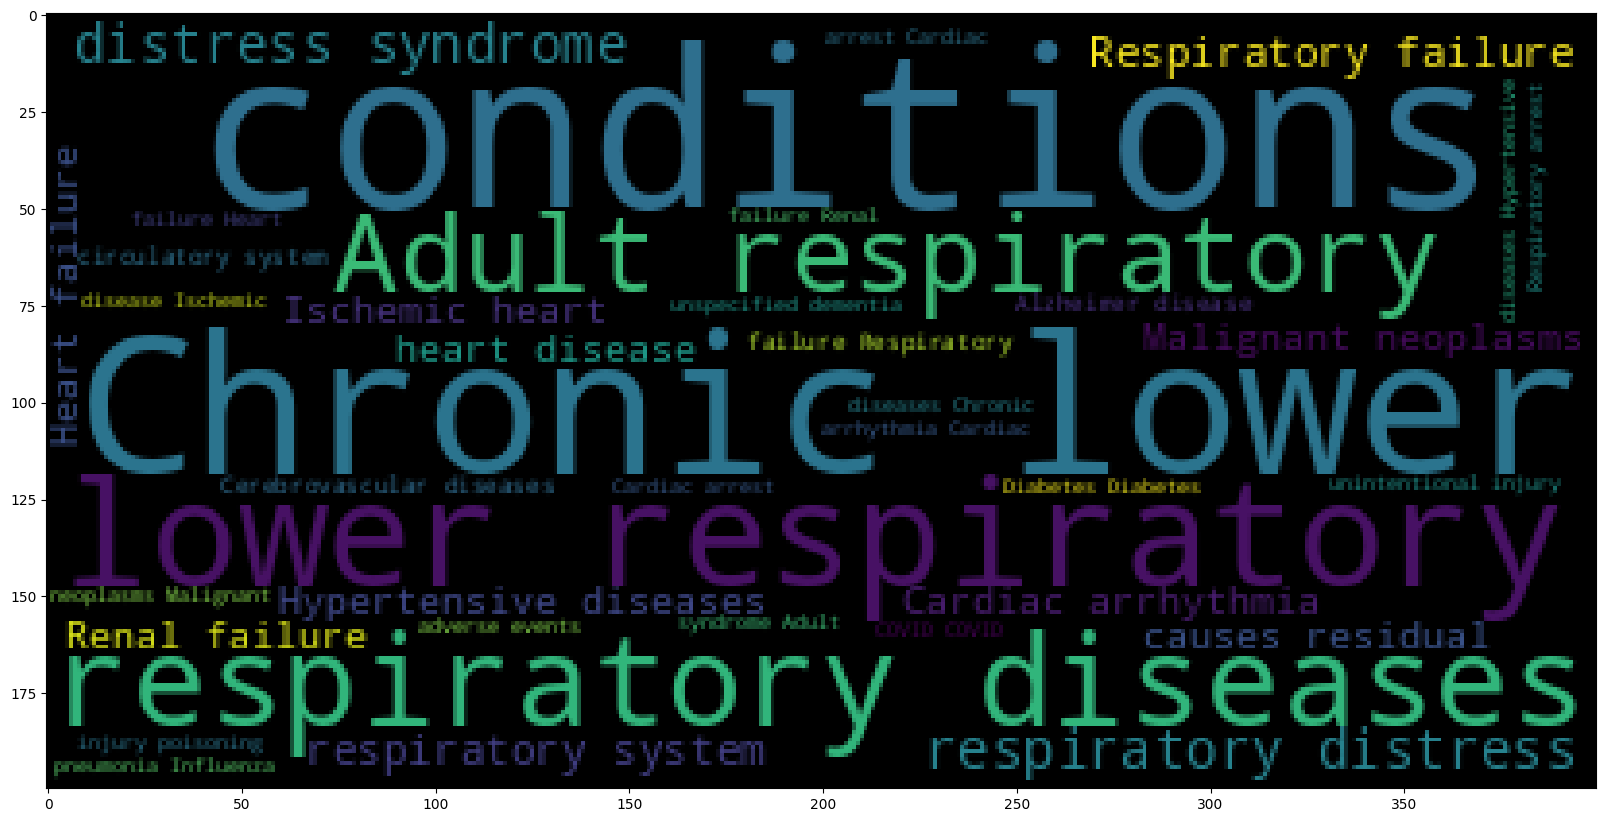

In [52]:
# import word cloud
from wordcloud import WordCloud

sentences = dataset3["Condition"].tolist()
sentences_as_a_string = ' '.join(sentences)


# Convert the string into WordCloud
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(sentences_as_a_string))


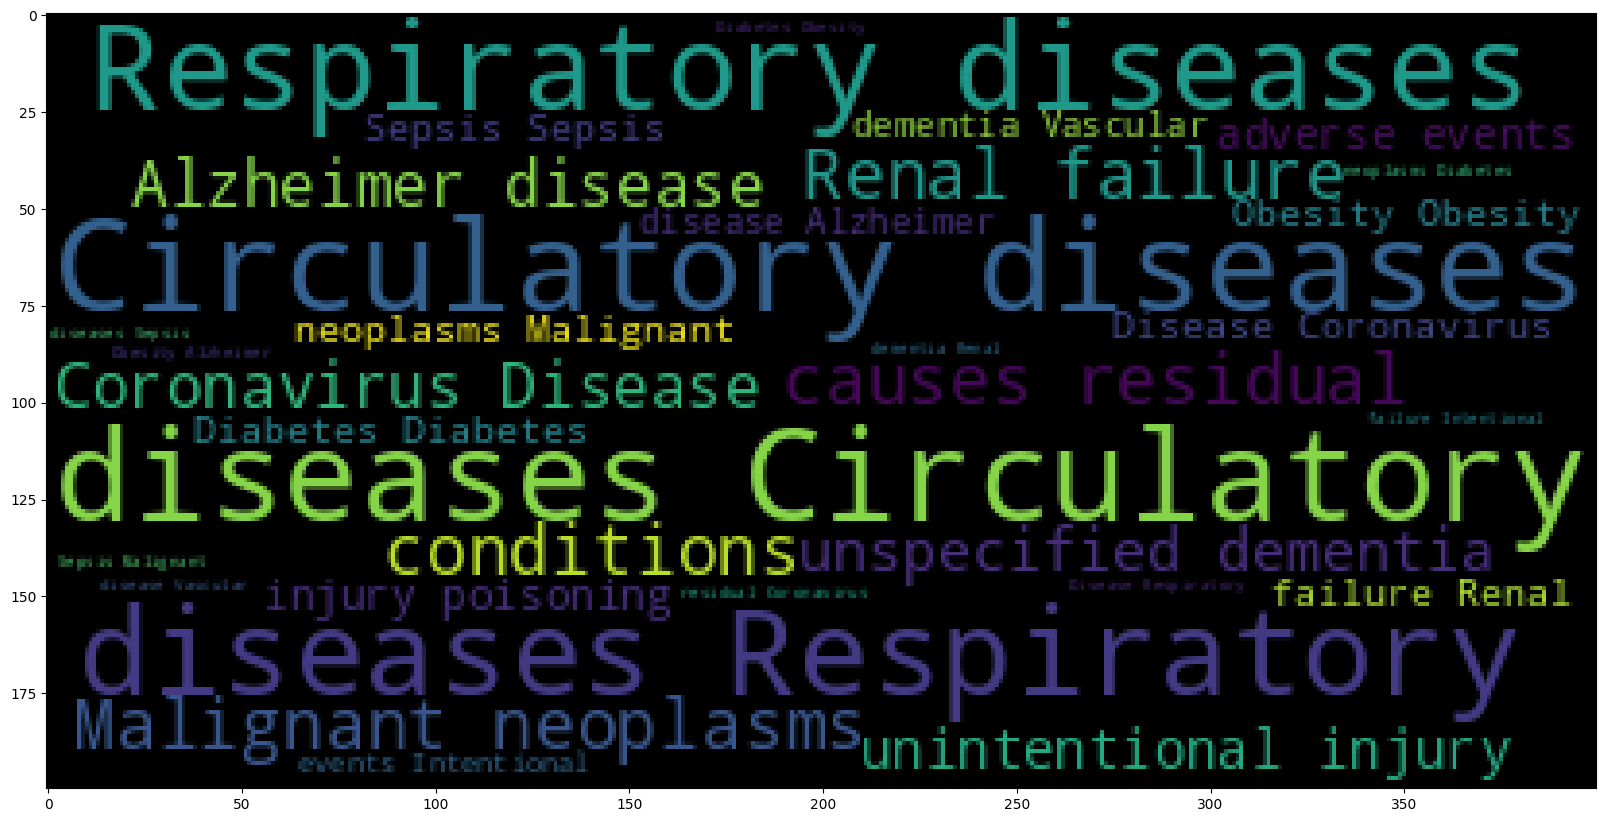

In [54]:
column2_tolist= dataset3["Condition Group"].tolist()

# Convert the list to one single string
column_to_string= " ".join(column2_tolist)

# Convert the string into WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(column_to_string))


Here, respiratory diseases are the major cause of death followed by circulatory diseases which are cardiovascular diseases.